<a href="https://colab.research.google.com/github/reemaAlnamazi/Global-Temperature-/blob/main/CS316_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Climate Change: Global Temperature Prediction

**Project Overview:**  
This project focuses on analyzing historical global temperature data to predict future temperature trends using Artificial Intelligence. Climate change is causing global temperatures to rise, impacting ecosystems, human health, and societies worldwide. By applying data science techniques, we aim to understand past temperature patterns and forecast future changes, which can support informed decisions for sustainability and climate action (SDG 13).

**Objective:**  
- Analyze historical global temperature data from NASA.  
- Build predictive models to forecast future temperature trends.  
- Visualize and interpret the results to identify significant patterns.

**Dataset:**  
We will use the NASA GISS Global Temperature Dataset, which records yearly temperature anomalies since 1880.

**Expected Outcome:**  
The project will show how global temperatures have changed over time and provide predictions for the near future, helping highlight the urgency of climate action and supporting sustainable planning.


### **Dataset Overview**
The NASA datasets include global, northern, and southern hemisphere temperature records, along with zonal temperature data.

Each dataset provides yearly temperature measurements across various regions and months.

**global_temps.xlsx**: Monthly global temperature anomalies from 1880 onward.

**nh_temps.csv & sh_temps.csv**: Contain Northern and Southern Hemisphere temperature records.

**zonann_temps.csv**: Zonal annual temperature data divided by latitude zones.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [2]:
df1=pd.read_excel('/content/global_temps.xlsx')
df2=pd.read_excel('/content/nh_temps.xlsx')
df3=pd.read_excel('/content/sh_temps.xlsx')
df4=pd.read_excel('/content/zonann_temps.xlsx')

print(df1.head(5))
print(df2.head(5))
print(df3.head(5))
print(df4.head(5))

   Year   Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov  \
0  1880 -0.19 -0.25 -0.09 -0.17 -0.10 -0.21 -0.18 -0.11 -0.15 -0.24 -0.22   
1  1881 -0.20 -0.15  0.03  0.05  0.05 -0.19  0.00 -0.04 -0.16 -0.22 -0.19   
2  1882  0.16  0.13  0.04 -0.16 -0.14 -0.22 -0.17 -0.08 -0.15 -0.24 -0.17   
3  1883 -0.30 -0.37 -0.13 -0.19 -0.18 -0.08 -0.08 -0.14 -0.23 -0.12 -0.24   
4  1884 -0.13 -0.09 -0.37 -0.40 -0.34 -0.35 -0.31 -0.28 -0.28 -0.25 -0.34   

    Dec   J-D   D-N   DJF   MAM   JJA   SON  
0 -0.18 -0.17   NaN   NaN -0.12 -0.17 -0.20  
1 -0.08 -0.09 -0.10 -0.18  0.04 -0.08 -0.19  
2 -0.36 -0.11 -0.09  0.07 -0.09 -0.16 -0.19  
3 -0.11 -0.18 -0.20 -0.34 -0.17 -0.10 -0.20  
4 -0.31 -0.29 -0.27 -0.11 -0.37 -0.32 -0.29  
   Year   Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov  \
0  1880 -0.37 -0.52 -0.24 -0.31 -0.07 -0.17 -0.19 -0.27 -0.24 -0.33 -0.44   
1  1881 -0.32 -0.24 -0.05 -0.01  0.02 -0.34  0.07 -0.05 -0.27 -0.45 -0.38   
2  1882  0.24  0.20  0.01 -0.3

# **Data Cleaning**


In [3]:
#checked data types and column names to ensure consistency.
df1.info()
df2.info()
df3.info()
df4.info()
print(df1.describe())
print(df2.describe())
print(df3.describe())
print(df4.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    144 non-null    int64  
 1   Jan     144 non-null    float64
 2   Feb     144 non-null    float64
 3   Mar     144 non-null    float64
 4   Apr     144 non-null    float64
 5   May     144 non-null    float64
 6   Jun     143 non-null    float64
 7   Jul     143 non-null    float64
 8   Aug     143 non-null    float64
 9   Sep     143 non-null    float64
 10  Oct     143 non-null    float64
 11  Nov     143 non-null    float64
 12  Dec     143 non-null    float64
 13  J-D     143 non-null    float64
 14  D-N     142 non-null    float64
 15  DJF     143 non-null    float64
 16  MAM     144 non-null    float64
 17  JJA     143 non-null    float64
 18  SON     143 non-null    float64
dtypes: float64(18), int64(1)
memory usage: 21.5 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 t

In [4]:
#Inspected missing values and detected a few null entries in monthly columns.
print(df1.isnull().sum())
print(df2.isnull().sum())
print(df3.isnull().sum())
print(df4.isnull().sum())


Year    0
Jan     0
Feb     0
Mar     0
Apr     0
May     0
Jun     1
Jul     1
Aug     1
Sep     1
Oct     1
Nov     1
Dec     1
J-D     1
D-N     2
DJF     1
MAM     0
JJA     1
SON     1
dtype: int64
Year    0
Jan     0
Feb     0
Mar     0
Apr     0
May     0
Jun     1
Jul     1
Aug     1
Sep     1
Oct     1
Nov     1
Dec     1
J-D     1
D-N     2
DJF     1
MAM     0
JJA     1
SON     1
dtype: int64
Year    0
Jan     0
Feb     0
Mar     0
Apr     0
May     0
Jun     1
Jul     1
Aug     1
Sep     1
Oct     1
Nov     1
Dec     1
J-D     1
D-N     2
DJF     1
MAM     0
JJA     1
SON     1
dtype: int64
Year       0
Glob       0
NHem       0
SHem       0
24N-90N    0
24S-24N    0
90S-24S    0
64N-90N    0
44N-64N    0
24N-44N    0
EQU-24N    0
24S-EQU    0
44S-24S    0
64S-44S    0
90S-64S    0
dtype: int64


In [5]:
df1 = df1.ffill()
df2 = df2.ffill()
df3 = df3.ffill()
df4 = df4.ffill()

In [6]:
df = df1.merge(df2, on='Year', suffixes=('_global', '_nh'))
df = df.merge(df3, on='Year', suffixes=('', '_sh'))
df = df.merge(df4, on='Year', suffixes=('', '_zon'))

In [7]:
print(df.head(10))

   Year  Jan_global  Feb_global  Mar_global  Apr_global  May_global  \
0  1880       -0.19       -0.25       -0.09       -0.17       -0.10   
1  1881       -0.20       -0.15        0.03        0.05        0.05   
2  1882        0.16        0.13        0.04       -0.16       -0.14   
3  1883       -0.30       -0.37       -0.13       -0.19       -0.18   
4  1884       -0.13       -0.09       -0.37       -0.40       -0.34   
5  1885       -0.59       -0.34       -0.27       -0.42       -0.45   
6  1886       -0.44       -0.51       -0.43       -0.28       -0.24   
7  1887       -0.72       -0.57       -0.36       -0.35       -0.31   
8  1888       -0.34       -0.36       -0.41       -0.20       -0.22   
9  1889       -0.09        0.16        0.06        0.10       -0.01   

   Jun_global  Jul_global  Aug_global  Sep_global  ...  24S-24N  90S-24S  \
0       -0.21       -0.18       -0.11       -0.15  ...    -0.13    -0.01   
1       -0.19        0.00       -0.04       -0.16  ...     0.10   

In [8]:
df.fillna(df.mean(), inplace=True)

## Exploratory Data Analysis (EDA)

This section presents an exploratory analysis of global temperature anomalies, including trend visualization, rolling averages, anomaly detection, and decade-level patterns.

In [10]:
eda_df = df[['Year', 'J-D_global']].copy()
eda_df = eda_df.rename(columns={'J-D_global': 'Temp'})
eda_df = eda_df.sort_values('Year').dropna(subset=['Year', 'Temp'])
eda_df.head()

,Year,Temp
0,1880,-0.17
1,1881,-0.09
2,1882,-0.11
3,1883,-0.18
4,1884,-0.29


# Historical line chart

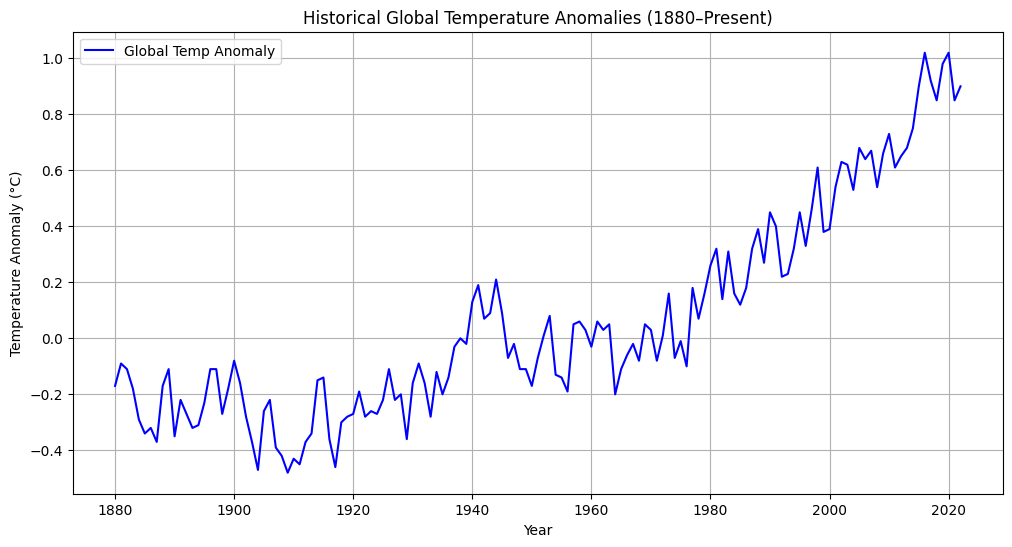

In [11]:
plt.figure(figsize=(12,6))
plt.plot(eda_df['Year'], eda_df['Temp'], label='Global Temp Anomaly', color='blue')
plt.title('Historical Global Temperature Anomalies (1880–Present)')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C)')
plt.grid(True)
plt.legend()
plt.show()

## **Rolling Average(5-years & 10-years)**

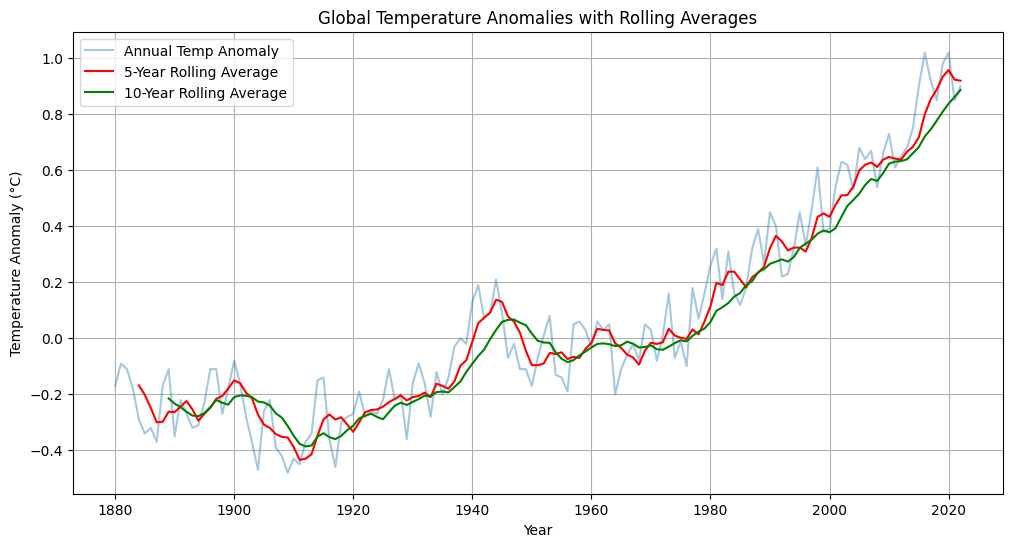

In [12]:
eda_df['Rolling_5yr'] = eda_df['Temp'].rolling(window=5).mean()
eda_df['Rolling_10yr'] = eda_df['Temp'].rolling(window=10).mean()

plt.figure(figsize=(12,6))
plt.plot(eda_df['Year'], eda_df['Temp'], label='Annual Temp Anomaly', alpha=0.4)
plt.plot(eda_df['Year'], eda_df['Rolling_5yr'], label='5-Year Rolling Average', color='red')
plt.plot(eda_df['Year'], eda_df['Rolling_10yr'], label='10-Year Rolling Average', color='green')

plt.title("Global Temperature Anomalies with Rolling Averages")
plt.xlabel("Year")
plt.ylabel("Temperature Anomaly (°C)")
plt.grid(True)
plt.legend()
plt.show()

# **Identify Anaomailes(Extreme Years)**

In [13]:
# Identify extreme anomaly years
top_anomalies = eda_df.nlargest(5, 'Temp')
lowest_anomalies = eda_df.nsmallest(5, 'Temp')

print("Top 5 Highest Temperature Anomalies:")
print(top_anomalies[['Year', 'Temp']])

print("\nTop 5 Lowest Temperature Anomalies:")
print(lowest_anomalies[['Year', 'Temp']])

Top 5 Highest Temperature Anomalies:
     Year  Temp
136  2016  1.02
140  2020  1.02
139  2019  0.98
137  2017  0.92
135  2015  0.90

Top 5 Lowest Temperature Anomalies:
    Year  Temp
29  1909 -0.48
24  1904 -0.47
37  1917 -0.46
31  1911 -0.45
30  1910 -0.43


# **Visulailze Extreme High Anamailes**

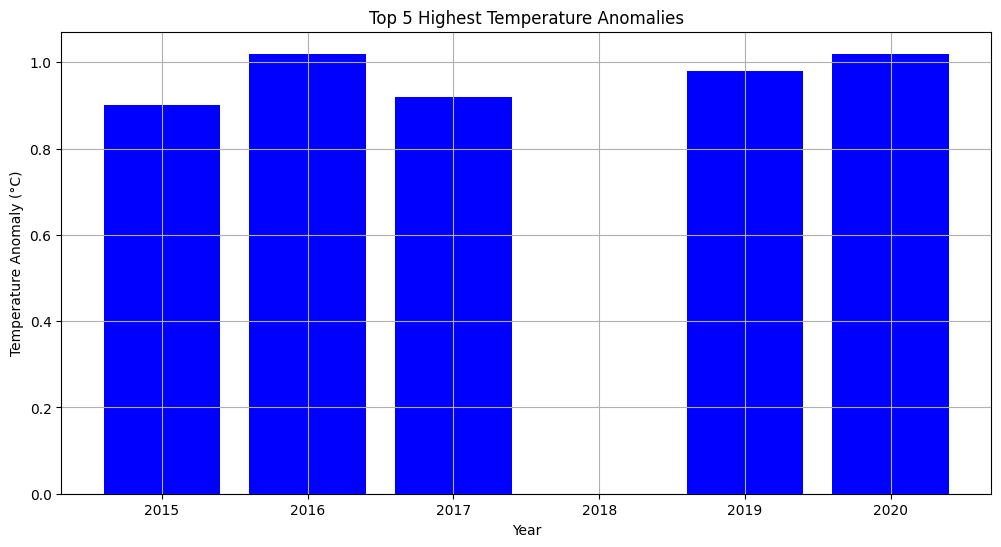

In [14]:
plt.figure(figsize=(12,6))
plt.bar(top_anomalies['Year'], top_anomalies['Temp'], color='blue')
plt.title("Top 5 Highest Temperature Anomalies")
plt.xlabel("Year")
plt.ylabel("Temperature Anomaly (°C)")
plt.grid(True)
plt.show()

**Linear Regression Model**

In [15]:
model_df = eda_df.copy()
X = model_df[['Year']]
y = model_df['Temp']
# our target is the dependent variable
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
    X, y, test_size=0.2, random_state=42)
# linear regression model
lr_model = sklearn.linear_model.LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
r2_lr = sklearn.metrics.r2_score(y_test, y_pred_lr)
rmse_lr = np.sqrt(sklearn.metrics.mean_squared_error(y_test, y_pred_lr))
print("Linear Regression Performance:")
print(f"R²   : {r2_lr:.4f}")
print(f"RMSE : {rmse_lr:.4f}")
print("-" * 40)
y_pred = lr_model.predict(X_test)




Linear Regression Performance:
R²   : 0.7727
RMSE : 0.1431
----------------------------------------


**Scatter Plot**

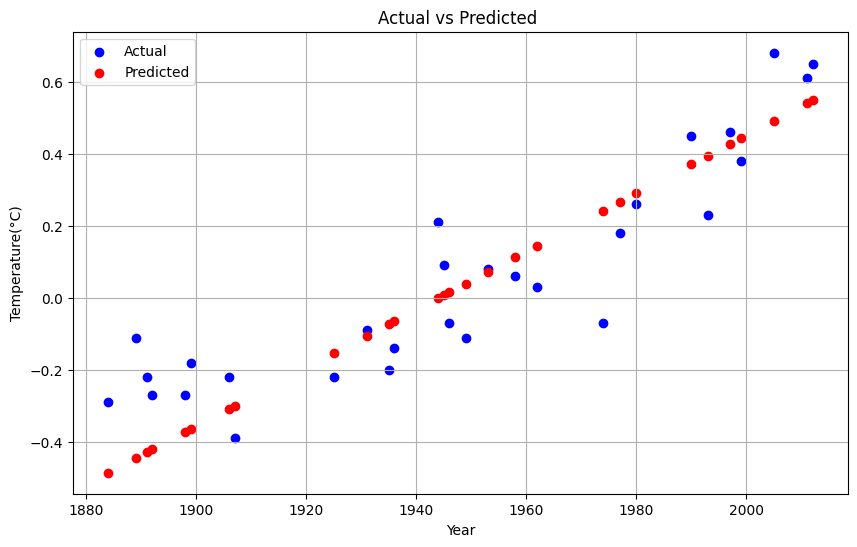

In [16]:
plt.figure(figsize=(10,6))
plt.scatter(X_test['Year'], y_test, color='blue', label='Actual')
plt.scatter(X_test['Year'], y_pred, color='red', label='Predicted')
plt.title('Actual vs Predicted ')
plt.xlabel('Year')
plt.ylabel('Temperature(°C)')
plt.grid(True)
plt.legend()
plt.show()

**Trend Line Plot**

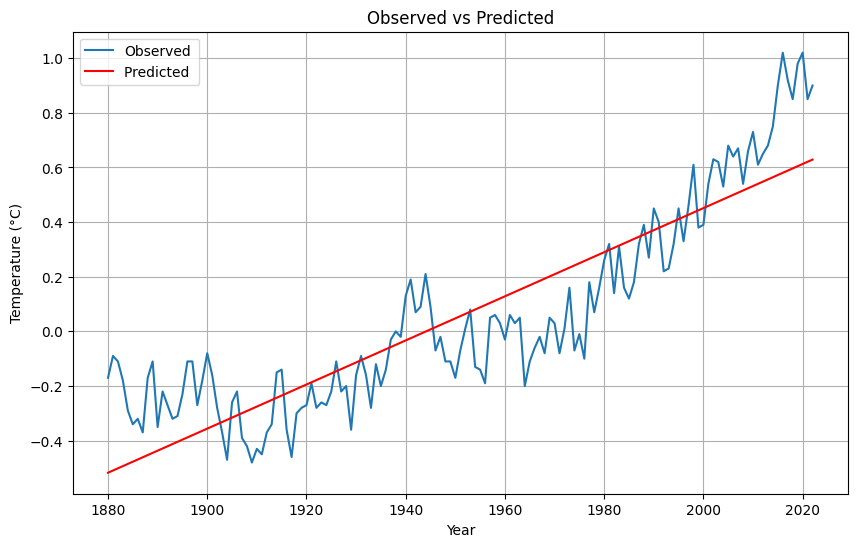

In [17]:
years_grid = model_df[['Year']].sort_values('Year')
lr_trend = lr_model.predict(years_grid)

plt.figure(figsize=(10,6))
plt.plot(model_df['Year'], model_df['Temp'], label='Observed', linewidth=1.5)
plt.plot(years_grid['Year'], lr_trend, label='Predicted ', linewidth=1.5, color='red')

plt.title('Observed vs Predicted')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.legend()
plt.show()

## Random Forest Regression

In [18]:
rf_model = RandomForestRegressor(n_estimators=300, max_depth=None,random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print("Random Forest Performance:")
print(f"R²   : {r2_rf:.4f}")
print(f"RMSE : {rmse_rf:.4f}")
print("-" * 40)

Random Forest Performance:
R²   : 0.8904
RMSE : 0.0994
----------------------------------------


## Visualization: Actual vs Predicted

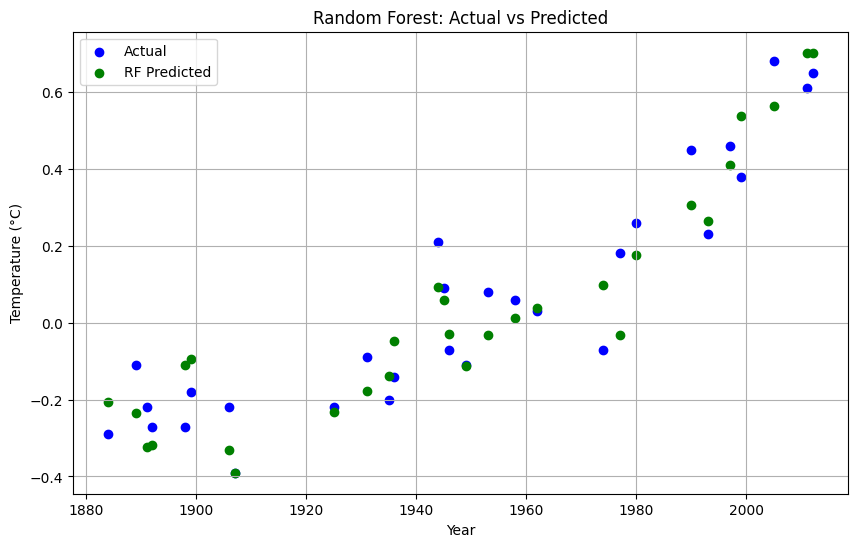

In [19]:
plt.figure(figsize=(10,6))
plt.scatter(X_test['Year'], y_test, label='Actual', color='blue')
plt.scatter(X_test['Year'], y_pred_rf, label='RF Predicted', color='green')
plt.title("Random Forest: Actual vs Predicted")
plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.legend()
plt.show()


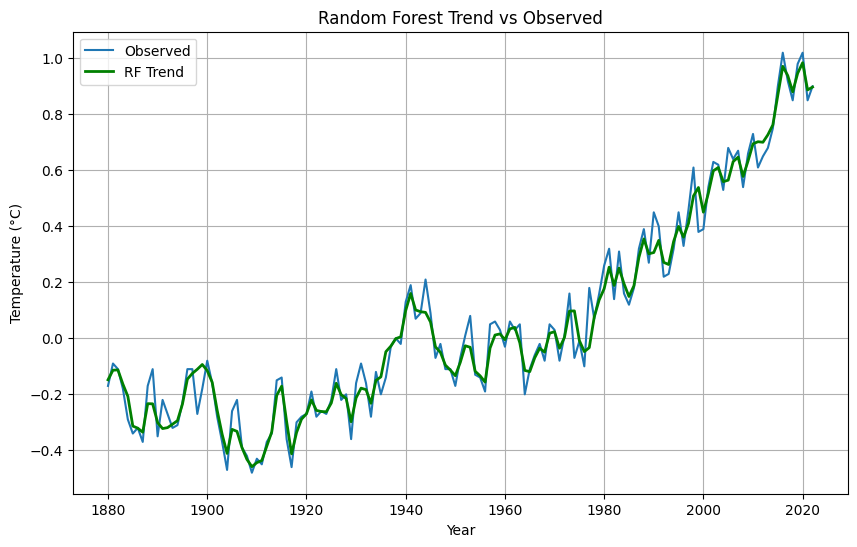

In [20]:
years_grid = model_df[['Year']].sort_values('Year')
rf_trend = rf_model.predict(years_grid)

plt.figure(figsize=(10,6))
plt.plot(model_df['Year'], model_df['Temp'], label='Observed', linewidth=1.5)
plt.plot(years_grid['Year'], rf_trend, label='RF Trend', linewidth=2, color='green')
plt.title("Random Forest Trend vs Observed")
plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.legend()
plt.show()

In [21]:
#comparison table
comparison_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest'],
    'R² Score': [r2_lr, r2_rf],
    'RMSE': [rmse_lr, rmse_rf]
})

print(comparison_df)


               Model  R² Score      RMSE
0  Linear Regression  0.772729  0.143105
1      Random Forest  0.890394  0.099380


## **Key Takeaways**

We successfully merged four
climate datasets into one unified dataframe aligned by year.

Data quality was validated through type inspection, missing-value analysis, and forward-filling where needed.

Exploratory analysis confirmed a clear long-term warming trend, supported by rolling averages (5-year and 10-year).

Extreme anomaly years were identified, visualized, and compared for better historical understanding.

Two predictive models were built: Linear Regression and Random Forest.

Random Forest captured non-linear patterns better, while Linear Regression provided a simple interpretable baseline.

Model performance was evaluated using R² and RMSE to compare accuracy and error.

The final pipeline demonstrates the full lifecycle of an AI/Data Science project: cleaning → EDA → modeling → evaluation.

Results support the global warming trend and show the increasing temperature anomaly over time.